In [30]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml  # mnist datasetini yüklemek için
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

mnist = fetch_openml("mnist_784")

In [31]:
mnist.data.shape

(70000, 784)

In [32]:
def showimage(dframe, index):
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)
    
    plt.imshow(some_digit_image, cmap="binary")
    plt.axis("off")
    plt.show()

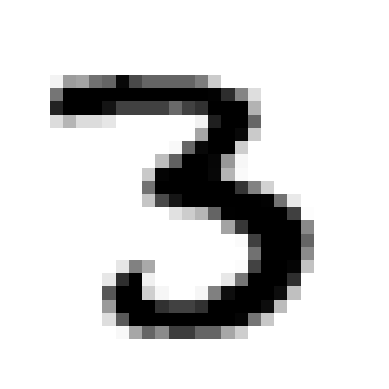

In [33]:
showimage(mnist.data,12)

In [34]:
# test ve train oranını 1/7 ve 6/7 yapalım
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data,mnist.target, test_size=1/7.0, random_state=0)


In [35]:
type(train_img)

pandas.core.frame.DataFrame

In [36]:
test_img_copy = test_img.copy()

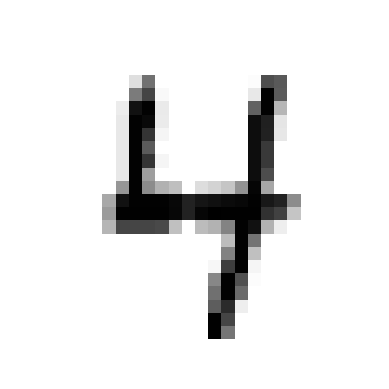

In [37]:
showimage(test_img_copy,1)

In [38]:
scaler = StandardScaler()

In [39]:
# verileri scale ediyoruz
scaler.fit(train_img)

StandardScaler()

In [40]:
# sadece train verilerini scale etmemiz yeterli ama transform işlemini iki set için de yapmalıyız
train_img =scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [41]:
pca = PCA(.95)

In [42]:
pca.fit(train_img)

PCA(n_components=0.95)

In [43]:
print(pca.n_components_)

327


In [44]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [47]:
# default solver çok yavaş çalıştığı için daha hızlı olan 'lbfgs' solver kullanıyoruz
logisticreg = LogisticRegression(solver= "lbfgs", max_iter=10000)

In [48]:
logisticreg.fit(train_img,train_lbl)

LogisticRegression(max_iter=10000)

In [56]:
logisticreg.predict(test_img[7].reshape(1,-1))

array(['1'], dtype=object)

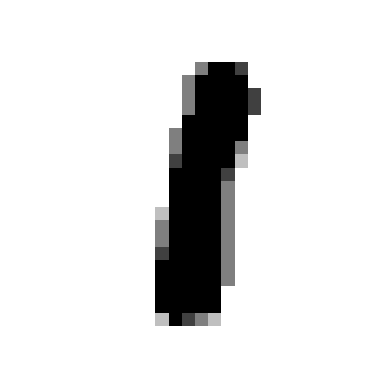

In [57]:
showimage(test_img_copy,7)

In [62]:
logisticreg.predict(test_img[3122].reshape(1,-1))

array(['2'], dtype=object)

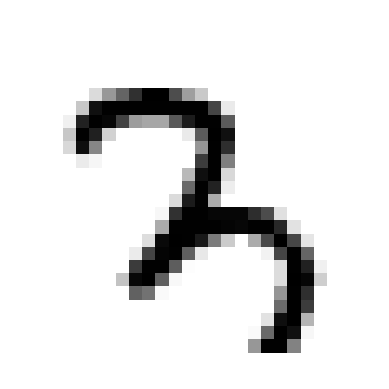

In [61]:
showimage(test_img_copy,3122)

In [58]:
# Doğruluk Oranı
logisticreg.score(test_img,test_lbl)

0.9183